In [ ]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import requests

def fetch_data(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    else:
        print("Erro ao buscar dados da API")
        return None

api_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30"
data = fetch_data(api_url)
data.head()


,timestamp,price
0,1713351770967,62886.057736
1,1713355664566,62769.016788
2,1713358891044,62319.048128
3,1713362600532,62617.824195
4,1713366253232,61235.831717


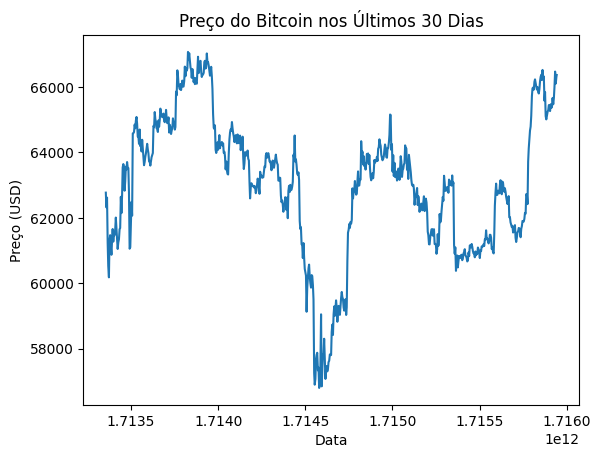

In [ ]:
data['price_diff'] = data['price'].diff()

data = data.dropna()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='timestamp', y='price', data=data)
plt.title("Preço do Bitcoin nos Últimos 30 Dias")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.show()


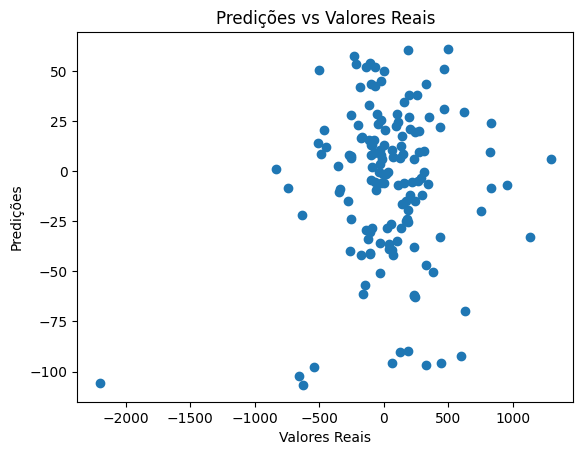

In [ ]:
X = data[['price']]
y = data['price_diff']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.title("Predições vs Valores Reais")
plt.show()


In [ ]:
gerador = pipeline('text-generation', model='pierreguillou/gpt2-small-portuguese', force_download=True)


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/850k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/508k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [ ]:
!pip install transformers[text-generation]

In [ ]:
from transformers import pipeline

# Usando um modelo treinado em português
gerador = pipeline('text-generation', model='pierreguillou/gpt2-small-portuguese')

prompt = "As tendências do mercado de criptomoedas para os próximos dias são:"

# Gerando o texto
insights = gerador(prompt, max_length=200, num_return_sequences=1, pad_token_id=50256, truncation=True)

print(insights[0]['generated_text'])


As tendências do mercado de criptomoedas para os próximos dias são:

O mercado de criptomoedas continua a crescer e se expandir de maneira constante com o passar do tempo, sendo que em 2000 foram produzidas uma grande quantidade de moeda digital, sendo, assim, as mais produtivas, como o Bitcoin.

O projeto Bitcoin foi lançado pelo Bitcoin Coins em 1 de abril de 1999. Em 12 de setembro de 2000, dois anos após o lançamento da moeda, a comunidade Bitcoin passou a receber mais de 7 milhões de usuários (10,75 milhões em 2000), superando as taxas de transação Bitcoin e Bitcoin, o que levou a todas as transações Bitcoin de bitcoin ao seu fim. Entretanto, o aumento gradual do Bitcoin começou e o aumento gradual dos participantes (0,5%) resultou, em dezembro de 2000, de uma explosão na participação e crescimento do Bitcoin no mercado de criptomoedas.
Desde que a primeira parcela da venda Bitcoin começou em 1999, a comunidade Bitcoin cresceu cada vez
